> # Polynomial Regression #

#### What if we have data which is much more complex than simple linear line? ####

#### We can use linear model to learn not linear data by adding the power of each feature. ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

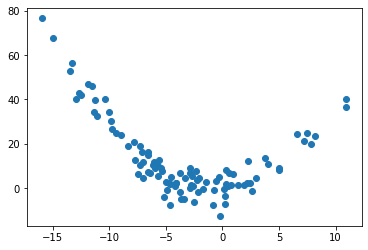

In [2]:
X = 6*np.random.randn(100, 1) - 3 
Y = 0.3* X**2 + 0.3*X + 1 + 5 * np.random.randn(100,1)
plt.scatter(X,Y)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)
X_poly[0]

array([-12.96370583, 168.05766886])

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

LinearRegression()

In [5]:
x_image = np.array([x for x in range(-15, 15,1)]).reshape(-1,1)
x_image_p = poly.fit_transform(x_image)
y_image = lin_reg.predict(x_image_p)

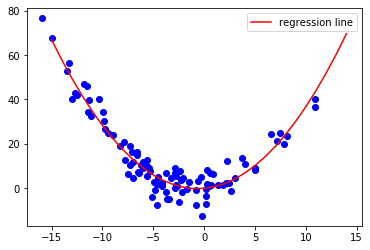

In [6]:
plt.scatter(X,Y, c='Blue')
plt.plot(x_image, y_image, c='r', label = 'regression line')
plt.legend()

### luckly, we can know the data can be expressed by quadratic fuction just watching scatter plot. ###

### But in most cases, we can't know what function is expressing these data. In this case, we can use learning curve. If error in training set is similar with error in validation set, the model is great model. ###

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_error, val_error = [] , []
    for x in range(1, len(X_train)):
        model.fit(X_train[:x], y_train[:x])
        y_train_predict = model.predict(X_train[:x])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:x], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    plt.xlabel('traing_set_size'); plt.ylabel("RMSE")
    plt.plot(np.sqrt(train_error), "r-+", linewidth = 2 , label = 'train_set')
    plt.plot(np.sqrt(val_error), "b-", linewidth = 3, label = 'validation_set')
    plt.legend()

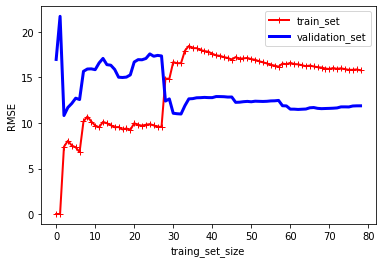

In [8]:
lin_reg = LinearRegression()
learning_curve(lin_reg, X, Y)

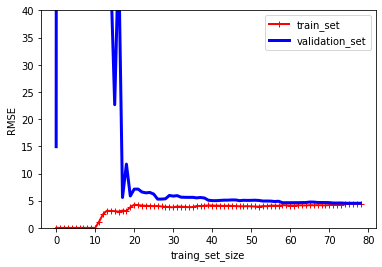

In [9]:
from sklearn.pipeline import Pipeline
poly_10 = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression())
])
plt.ylim(0,40)
learning_curve(poly_10, X, Y)